# Bayesian linear regression

In [ ]:
bold_start = '\033[1m'
bold_end = '\033[0m'

In [ ]:
# Import packages
import numpy as np  # numerical computations
import pandas as pd # facilitate data visualization and analysis under structures
import matplotlib.pyplot as plt # MATLAB-like plotting
import seaborn as sns # attractive and informative statistical graphics

## P1 - Generative model

Assume that a data generation model follows the laws below:

$$
\alpha_i \sim \mathcal{N}(\mu_{\alpha}, \sigma_{\alpha}^2)
, \quad
\beta_i \sim \mathcal{N}(\mu_{\beta}, \sigma_{\beta}^2);
$$

$$
y_i = \alpha_i + \beta_i \times x_i \, \text{with} \, \,  x_i \sim \mathcal{U}(0, 10).
$$

a) Generate a dataset with two columns for $x_i$ and $y_i$ for N = 500 samples with $\mu_{\alpha}=7$, $\sigma_{\alpha}^2=2$, $\mu_{\beta}=3$, and $\sigma_{\beta}^2=1$ .

**Solution**:



In [ ]:
# Parameter Settings
mu_alpha = 7; sigma_alpha = 2            # mean and std of the distribution of the intercept alpha
mu_beta  = 3; sigma_beta  = 1 # mean and std of the distribution of the slope beta
N = 500 # sample size

np.random.seed(1) # Set the seed for reproducibility (toggle to have random generation)
# Variable generation
alpha = np.random.normal(mu_alpha, sigma_alpha, N) # intercept generated with the normal distribution
beta  = np.random.normal(mu_beta, sigma_beta, N)   # slope generated with the normal distribution

X = np.random.uniform(0, 10, N) # predictor X generated with the uniform distribution over [0,10]
Y = alpha + beta*X              # target Y generated with a linear model

# Create 2-column dataset with pandas
print(f'{bold_start}Generated {N} samples{bold_end}')
data = pd.DataFrame({'X': X, 'Y': Y})
data

Generated 500 samples


,X,Y
0,3.869892,15.204496
1,4.928809,20.844452
2,2.544381,11.542446
3,8.849665,28.822544
4,3.832635,19.236132
...,...,...
495,9.268412,32.068728
496,5.519950,12.047039
497,9.639159,30.772182
498,2.809555,14.207460



b) Plot the points generated for $Y$ against $X$.

**Solution**:

Scatter X against Y


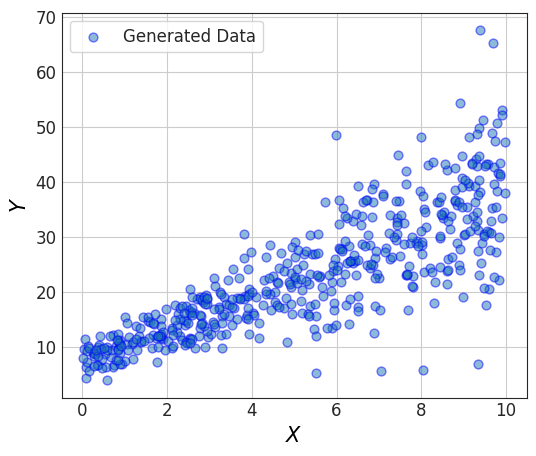

In [ ]:
print(f'{bold_start}Scatter X against Y{bold_end}')
scale = 2
FS = 15; FS1=12; LW= 0.05*scale; MS = 20*scale; LP = -0.010

sns.set_style('white')
plt.rcParams['figure.figsize'] = (3*scale,2.5*scale)
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'
plt.rc('xtick', labelsize= FS1)
plt.rc('ytick', labelsize= FS1)

## Original data points
plt.scatter (X, Y, s = MS, alpha=0.5, edgecolors='b', label= r'Generated Data')

plt.xlabel(r'$X$', fontsize=FS, color = 'k')
plt.ylabel(r'$Y$', fontsize=FS, color = 'k')
plt.legend(fontsize=FS1)
plt.grid()
plt.show()

## P2 - Linear regression

Calibrate a linear regression on this data. Add the obtained line into the previous plot.

**Solution**:

Here I use *sklearn* Linear Regression (LR) to fit linear model for the generated data $(X,Y)$. The principles are: \\

i. Split $(X,Y)$ into training $(X_{train},Y_{train})$ and testing $(X_{test},Y_{test}) $ datasets with a ratio of 2:1. \\
ii. Fit *sklearn* LR model on the $(X_{train},Y_{train})$. \\
iii. Predict $X_{test}$ and evaluate with $Y_{test}$.

The estimates of slope ($\alpha$) and intercept ($\beta$) and $R^2$-score are reported and the LR model is ploted with generated data.


Linear Regression Coefficients:
+ Intercept α: (estimated ± standard error) 6.77 ± 0.73, (true mean ± std) 7 ± 2
+ Slope β:     (estimated ± standard error) 3.05 ± 0.12, (true mean ± std) 3 ± 1
Root of Mean Square Error computed on testing data: 5.73
R-squared computed on testing data: 0.71


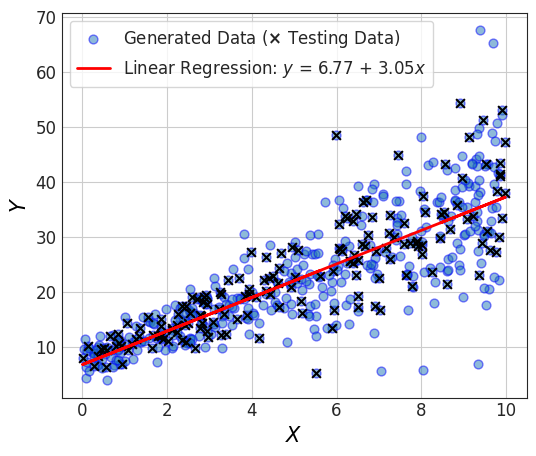

In [ ]:
from sklearn.linear_model import LinearRegression    # Load sklearn linear regression to fit X to Y
from sklearn.model_selection import train_test_split # Load function to split the data into training and test subsets

# Reshape X for sklearn
X_reshaped = X.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_reshaped, Y, test_size= 1/3, random_state=0)

# Fit the linear regression model
LR = LinearRegression()
LR.fit(X_train, Y_train)
alpha_LR = LR.intercept_
beta_LR = LR.coef_[0]

# Predict y values using the fitted model
Y_pred = LR.predict(X_test)

# Compute standard errors for LR coeficicients' estimates
residuals = Y_train - LR.predict(X_train)
rss = np.sum(residuals**2)       # residual sum of squares
n,d = X_train.shape              # number of samples (sample size) and number of features (variable dimension)
residual_var = rss / (n - d - 1) # residual variance
Xt = np.hstack([np.ones((n, 1)), X_train])
std_coef = np.sqrt(np.diag( residual_var * np.linalg.inv(Xt.T @ Xt) )) # variance-covariance matrix of the coefficients

nbround = 2 # number of dicimals
# Print the coefficients
print(f'{bold_start}Linear Regression Coefficients:{bold_end}')
print(f'+ Intercept α: (estimated ± standard error) {round(alpha_LR,nbround)} ± {round(std_coef[0],nbround)}, (true mean ± std) {mu_alpha} ± {sigma_alpha}')
print(f'+ Slope β:     (estimated ± standard error) {round(beta_LR,nbround)} ± {round(std_coef[1],nbround)}, (true mean ± std) {mu_beta} ± {round(sigma_beta,nbround)}')
print(f'{bold_start}Root of Mean Square Error{bold_end} computed on testing data:', np.sqrt(np.mean((Y_pred - Y_test)**2)).round(nbround))
print(f'{bold_start}R-squared{bold_end} computed on testing data:', LR.score(X_test, Y_test).round(nbround))

# Plot
scale = 2
FS = 15; FS1=12; LW= 0.05*scale; MS = 20*scale; LP = -0.010
sns.set_style('white')
plt.rcParams['figure.figsize'] = (3*scale,2.5*scale)
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'
plt.rc('xtick', labelsize= FS1)
plt.rc('ytick', labelsize= FS1)

## Original data points
plt.scatter (X, Y, s = MS, alpha=0.5, edgecolors='b', label= r'Generated Data ($\mathbf{\times}$ Testing Data)')
plt.scatter (X_test, Y_test, s = MS, marker = 'x', c='k') #, label= r'Test Data'
## Regression line
plt.plot(X_test, Y_pred, color='red', linewidth=2, label= r'Linear Regression: $y$ = {} + {}$x$'.format(round(LR.intercept_,nbround), round(LR.coef_[0],nbround)))

plt.xlabel(r'$X$', fontsize=FS, color = 'k')
plt.ylabel(r'$Y$', fontsize=FS, color = 'k')
plt.legend(fontsize=FS1)
plt.grid()
plt.show()

## P3 - Bayesian linear regression

Calibrate a Bayesian linear regression on the data.

**Solution**:

Let formulate a general linear model
$$
Y = \alpha  + \beta X + ϵ,
$$
where noise $\epsilon$ has Gaussian distribution $\mathcal{N} (0,\sigma^2)$.

In Bayesian Linear Regression, the intercept $\alpha$ and slope $\beta$ are assumed to be random variables. These coefficients can be drawn following the posterior distribution
$$
p \left(\alpha, \beta | Y, X \right) = \frac{p \left( Y, \alpha, \beta  | X \right)}{P(Y|X)}  ∝ \int p \left( Y | X, \alpha, \beta,\sigma^2\right) \,p_0(\alpha, \beta,\sigma^2) \, d\sigma^2.
$$
where
*  $(X,Y)$ are given datasets of predictor and target variables,
*  $p \left( Y | X, \alpha, \beta, \sigma^2 \right)$ is the likelihood function,
*  $p_0(\alpha, \beta,\sigma^2)$ is the joint prior distribution of the linear coefficients and noise variance. It can be factorised into
$\,p_0(\alpha,\beta | \sigma^2) \, p \left( \sigma^2 \right) $ or further into $\,p_0(\alpha)\, p_0(\beta ) \, p \left( \sigma^2 \right) $ on account of parameter dependency.

** The joint prior distribution of $\alpha$ and $\beta$ or its two marginal distribitions (as if $\alpha$ and $\beta$ are independent and their prior distributions are known) are used to assumed to be Gaussian. The prior of $\sigma^2$ is referred to as an inverse-gamma distribution. The selection of conjugate priors facilitate analytical calculations.





### a) What is the prior on the slope and the intercept ?

**Solution**:

Assume that the prior distributions of the slope $\beta$ and intercept $\alpha$ are given with the Gaussian distribution,
$$
p_0(\alpha, \beta) = \mathcal{N} (\mu_{0}, \Sigma_{0})
, \quad \text{with} \,\,
\mu_{0}  = \begin{pmatrix}
\mu_{\alpha,0}\\
\mu_{\beta,0}
\end{pmatrix}
\&  \,
\Sigma_{0} = \begin{pmatrix}
\sigma_{\alpha,0}^2 & 0\\
0 & \sigma_{\beta,0}^2
\end{pmatrix}
$$
Linear regression possesses a simple and fast manner to estimate initial parameters that can be use to localize for the prior mean estimates of $\alpha$ and $\beta$ in Bayesian linear regresssion. If one has a high confidence in the hypothesis about parameter distributions, a low variance implies; otherwise.


<Figure size 300x300 with 0 Axes>

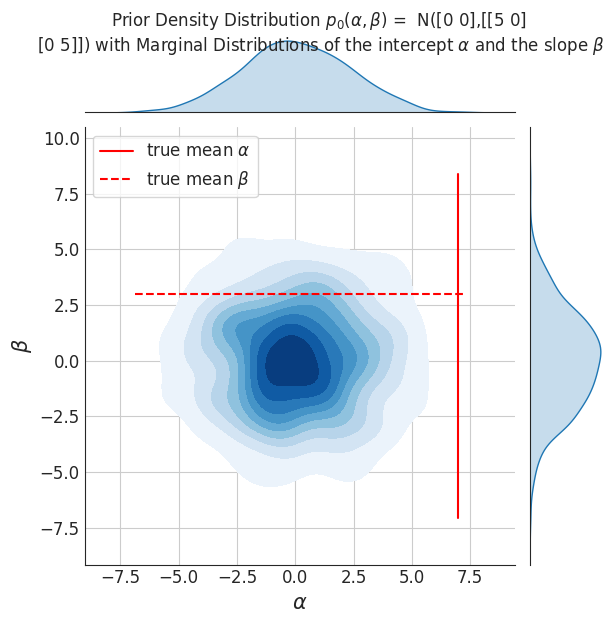

In [ ]:
# Define prior parameters for alpha (intercept) and beta (slope)
mean_prior = np.array([0, 0])
std_prior = np.array([5, 5])

# mean_prior = np.array([alpha_LR, beta_LR])     # Used LR to give prior estimates of alpha and beta : posibly convert quicker
# std_prior = np.array([std_coef[0],std_coef[1]])

mu_prior = mean_prior
sigma_prior = np.diag(std_prior);

n_samples = 1000 # Number of samples
BLR_prior = np.random.multivariate_normal(mu_prior, sigma_prior, n_samples)
prior = pd.DataFrame(BLR_prior, columns=['alpha', 'beta'])

# Plot density distribution
plt.figure(figsize=(3, 3))
sns.jointplot(x='alpha', y='beta', data=prior, kind='kde', fill=True, cmap='Blues',  levels=10)
plt.plot([mu_alpha, mu_alpha],[prior['beta'].min(), prior['beta'].max()],'r', label = r'true mean $\alpha$')
plt.plot([prior['alpha'].min(), prior['alpha'].max()], [mu_beta, mu_beta],'r--', label = r'true mean $\beta$')
plt.suptitle(r'Prior Density Distribution $p_0(\alpha,\beta)$ =  N({},{}) with Marginal Distributions of the intercept $\alpha$ and the slope $\beta$'.format(mu_prior,sigma_prior), y=1.02)

plt.legend(fontsize = FS1)
plt.xlabel(r'$\alpha$', fontsize = FS)
plt.ylabel(r'$\beta$', fontsize = FS)
plt.grid()
plt.show()

In [ ]:
# ln p(alpha, beta, sigma)
def log_prior(alpha, beta, sigma):
    lp = -0.5 * ((alpha - mean_prior[0])**2 / std_prior[0]**2 + (beta - mean_prior[1])**2/  std_prior[1]**2) - np.log(sigma)
    return lp

# ln p(Y|X,alpha, beta, sigma)
def log_likelihood(alpha, beta, sigma, x, y):
    y_pred = alpha + beta * x
    llh = -0.5 * np.sum(((y - y_pred) / sigma)**2 + np.log(2 * np.pi * sigma**2))
    return llh

# ln p(alpha, beta, sigma | Y, X)
def log_posterior(alpha, beta, sigma, x, y):
    return log_prior(alpha, beta, sigma) + log_likelihood(alpha, beta, sigma, x, y)

# Metropolis Hastings for MCMC sampling of posterior distributions of parameters
def metropolis_hastings(log_posterior, initial_params, iterations, step_size, x, y):
    n_params = len(initial_params)
    params = np.zeros((iterations, n_params))
    params[0] = initial_params
    log_posterior_curr = log_posterior(*initial_params, x, y)

    for i in range(1, iterations):
        proposal = params[i-1] + np.random.normal(0, step_size, n_params)
        log_posterior_proposed = log_posterior(*proposal, x, y)

        if np.log(np.random.rand()) < log_posterior_proposed - log_posterior_curr:
            params[i] = proposal
            log_posterior_curr = log_posterior_proposed
        else:
            params[i] = params[i-1]

    return params

# Initial values
params_init = [0, 0, 1] # set initial parameters for the slope alpha, intercept beta, and error noise std sigma
N_iter = 10000
step_size = [0.1, 0.1, 0.1]

# Metropolis-Hastings MCMC
params = metropolis_hastings(log_posterior, params_init, N_iter, step_size, X_train.ravel(), Y_train.ravel())

# Number of burn-in samples
burn_in = 1000

# Posterior samples for alpha, beta, and sigma after burn-in: the choice of the prior is therefore pivotal for complexicity reduction
BLR_alpha = params[burn_in:, 0]
BLR_beta = params[burn_in:, 1]
BLR_sigma = params[burn_in:, 2]

# Print the coefficients
print(f'{bold_start}Bayesian Linear Regression Coefficients:{bold_end}')
print(f'+ Intercept α: (estimated mean ± std) {round(np.mean(BLR_alpha),nbround)} ± {round(np.std(BLR_alpha),nbround)}, (true mean ± std) {mu_alpha} ± {sigma_alpha}')
print(f'+ Slope β:     (estimated mean ± std) {round(np.mean(BLR_beta),nbround)} ± {round(np.std(BLR_beta),nbround)}, (true mean ± std) {mu_beta} ± {round(sigma_beta,nbround)}')
print(f'+ Noise σ:     (estimated mean ± std) {round(np.mean(BLR_sigma),nbround)} ± {round(np.std(BLR_sigma),nbround)}')
# print('Root of Mean Square Error computed on testing data:', np.sqrt(np.mean((Y_pred - Y_test)**2)).round(nbround))
# print('R-squared computed on testing data:', LR.score(X_test, Y_test).round(nbround))



Bayesian Linear Regression Coefficients:
+ Intercept α: (estimated mean ± std) 6.79 ± 0.54, (true mean ± std) 7 ± 2
+ Slope β:     (estimated mean ± std) 3.05 ± 0.1, (true mean ± std) 3 ± 1
+ Noise σ:     (estimated mean ± std) 6.73 ± 0.25


### b) Plot the posterior distribution of the slope and the intercept. Does the generative model's mean values fall within the 95% credibility interval ?

**Solution**:


95% CI of the intercept α: [5.59490358 7.77533851]; the generative model's mean values fall within the 95% CI: True
95% CI of the slope β: [2.87508389 3.22980934]; the generative model's mean values fall within the 95% CI: True


<Figure size 300x300 with 0 Axes>

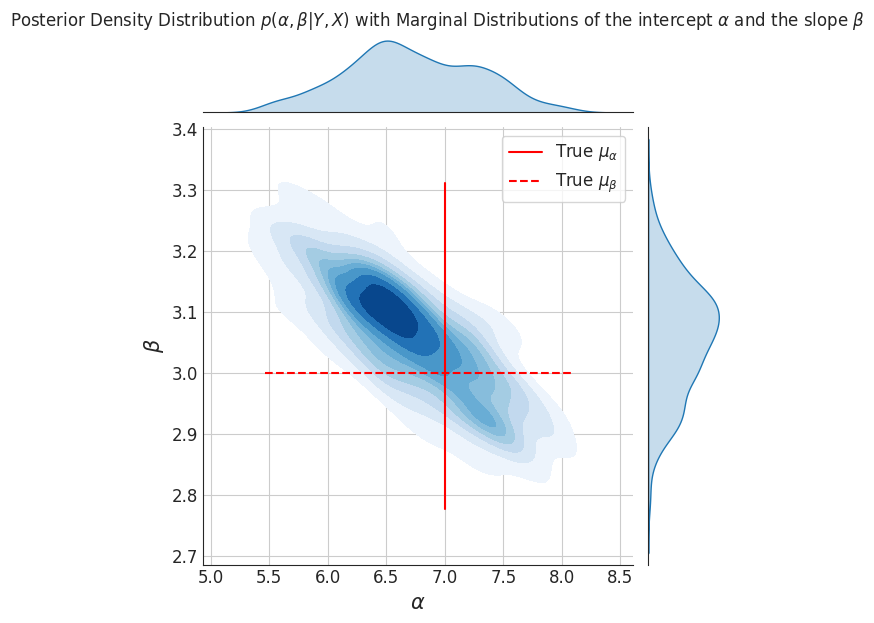

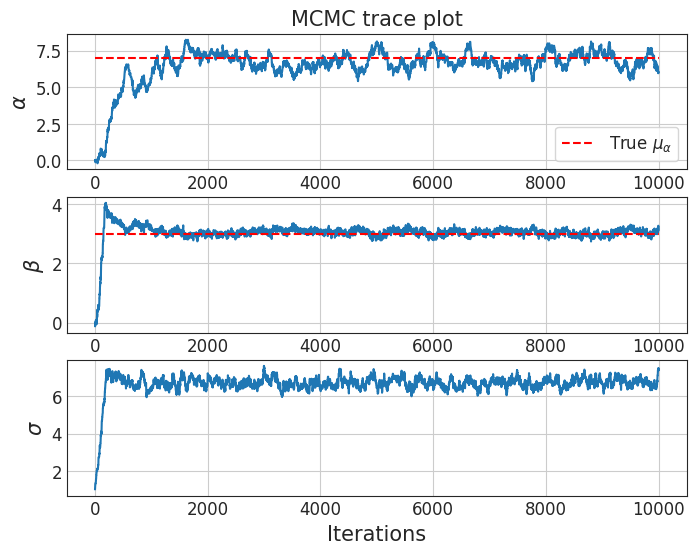

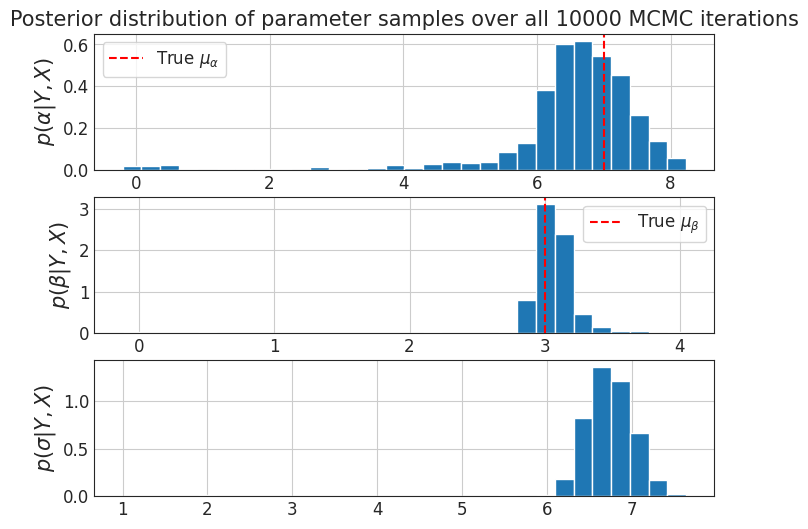

In [ ]:
posterior = pd.DataFrame(params[-n_samples:, :2], columns=['alpha', 'beta'])

# 95% credibility interval of the slope and the intercept posterior samples
CI_alpha = np.percentile(posterior['alpha'], [2.5, 97.5])
CI_beta = np.percentile(posterior['beta'], [2.5, 97.5])

print(f'{bold_start}95% CI of the intercept α:{bold_end} {CI_alpha}; {bold_start}the generative model\'s mean values fall within the 95% CI:{bold_end} {(mu_alpha >= CI_alpha[0]) & (mu_alpha <= CI_alpha[1])}' )
print(f'{bold_start}95% CI of the slope β:{bold_end} {CI_beta}; {bold_start}the generative model\'s mean values fall within the 95% CI:{bold_end} {(mu_beta >= CI_beta[0]) & (mu_beta <= CI_beta[1])}' )

# Plot density distribution
plt.figure(figsize=(3, 3))
sns.jointplot(x='alpha', y='beta', data=posterior, kind='kde', fill=True, cmap='Blues',  levels=10)
plt.plot([mu_alpha, mu_alpha],[posterior['beta'].min(), posterior['beta'].max()],'r', label = r'True $\mu_{\alpha}$')
plt.plot([posterior['alpha'].min(), posterior['alpha'].max()], [mu_beta, mu_beta],'r--', label = r'True $\mu_{\beta}$')
plt.suptitle(r'Posterior Density Distribution $p(\alpha,\beta|Y,X)$ with Marginal Distributions of the intercept $\alpha$ and the slope $\beta$', y=1.02)
plt.legend(fontsize = FS1)
plt.xlabel(r'$\alpha$',fontsize = FS)
plt.ylabel(r'$\beta$',fontsize = FS)
plt.grid()
plt.show()


# Trace plots
fig, axes = plt.subplots(3, 1, figsize=(8, 6))
axes[0].plot(params[:, 0])
axes[0].plot([0, N_iter], [mu_alpha, mu_alpha],'r--', label = r'True $\mu_{\alpha}$')
# axes[0].plot([0, N_iter], [mu_alpha-2*sigma_alpha, mu_alpha-2*sigma_alpha],'k:')  # 95% lower bound
# axes[0].plot([0, N_iter], [mu_alpha+2*sigma_alpha, mu_alpha+2*sigma_alpha],'k:')  # 95% upper bound
axes[0].set_title(r'MCMC trace plot',fontsize = FS)
axes[0].set_ylabel(r'$\alpha$',fontsize = FS)
axes[0].legend(fontsize = FS1)
axes[0].grid()

axes[1].plot(params[:, 1])
axes[1].plot([0, N_iter], [mu_beta, mu_beta],'r--', label = r'True $\mu_{\beta}$')
# axes[1].plot([0, N_iter], [mu_beta-2*sigma_beta, mu_beta-2*sigma_beta],'k:') # 95% lower bound
# axes[1].plot([0, N_iter], [mu_beta+2*sigma_beta, mu_beta+2*sigma_beta],'k:') # 95% upper bound
axes[1].set_ylabel(r'$\beta$',fontsize = FS)
# axes[1].legend(fontsize = FS1)
axes[1].grid()

axes[2].plot(params[:, 2])
axes[2].set_ylabel(r'$\sigma$',fontsize = FS)
axes[2].grid()
plt.xlabel('Iterations',fontsize = FS)
plt.show()

# Marginal Posterior distributions : over all MCMC iterations
fig, axes = plt.subplots(3, 1, figsize=(8, 6))
axes[0].hist(params[:, 0], bins=30, density=True)
axes[0].axvline(mu_alpha, color='red', linestyle='--', label=r'True $\mu_{\alpha}$')
axes[0].set_title(f'Posterior distribution of parameter samples over all {N_iter} MCMC iterations',fontsize = FS)
axes[0].set_ylabel(r'$p(\alpha | Y,X)$',fontsize = FS)
axes[0].legend(fontsize = FS1)
axes[0].grid()

axes[1].hist(params[:, 1], bins=30, density=True)
axes[1].axvline(mu_beta, color='red', linestyle='--', label=r'True $\mu_{\beta}$')
axes[1].set_ylabel(r'$p(\beta | Y,X)$',fontsize = FS)
axes[1].legend(fontsize = FS1)
axes[1].grid()

axes[2].hist(params[:, 2], bins=30, density=True)
axes[2].set_ylabel(r'$p(\sigma | Y,X)$',fontsize = FS)
axes[2].grid()
plt.show()


### c) Plot the Bayesian linear regression and its 95% credibility interval on the previous plot.

**Solution**:

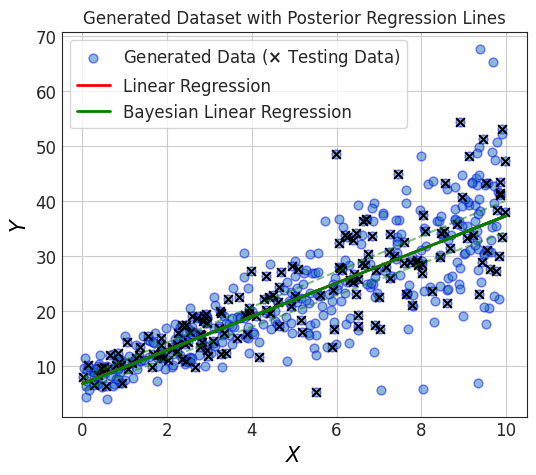

LR Root of Mean Square Error computed on testing data: 5.73
Bayesian LR Root of Mean Square Error computed on testing data: 5.75


In [ ]:
BLR_alpha = params[-n_samples:, 0]
BLR_beta = params[-n_samples:, 1]

Y_BLR = np.zeros((n_samples, len(X_test)))
error = np.zeros((n_samples, len(X_test)))
for i in range(n_samples):
    Y_BLR[i,:] = BLR_alpha[i] + BLR_beta[i] * X_test.ravel()
    error[i,:] = Y_test - Y_BLR[i,:]

# CI_Y_BLR = np.percentile(Y_BLR, [2.5, 97.5], axis=0)
Y_BLR_lower = np.percentile(Y_BLR, 2.5, axis=0)
Y_BLR_upper = np.percentile(Y_BLR, 97.5, axis=0)

# Plot
scale = 2
FS = 15; FS1=12; LW= 0.05*scale; MS = 20*scale; LP = -0.010


sns.set_style('white')
plt.rcParams['figure.figsize'] = (3*scale,2.5*scale)
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'
plt.rc('xtick', labelsize= FS1)
plt.rc('ytick', labelsize= FS1)

## Original data points
plt.scatter (data['X'], data['Y'], s = MS, alpha=0.5, edgecolors='b', label= r'Generated Data ($\mathbf{\times}$ Testing Data)')
plt.scatter (X_test, Y_test, s = MS, marker = 'x', c='k') #, label= r'Test Data'

## Regression line
plt.plot(X_test, Y_pred, color='red', linewidth=2, label= r'Linear Regression')

## Bayesian Regression lines
plt.plot(X_test.ravel(), Y_BLR.mean(0), color='g',  linewidth=2, label= r'Bayesian Linear Regression')
plt.plot(np.array([X_test.min(), X_test.max()]), np.percentile(BLR_alpha,2.5) + np.percentile(BLR_beta,2.5) * np.array([X_test.min(), X_test.max()]), '--', color='g', alpha=0.5)#,   label='95% CI')
plt.plot(np.array([X_test.min(), X_test.max()]), np.percentile(BLR_alpha,97.5) + np.percentile(BLR_beta,97.5) * np.array([X_test.min(), X_test.max()]), '--', color='g', alpha=0.5)

plt.title('Generated Dataset with Posterior Regression Lines')
plt.xlabel(r'$X$', fontsize=FS, color = 'k')
plt.ylabel(r'$Y$', fontsize=FS, color = 'k')
plt.legend(fontsize=FS1)
plt.grid()
plt.show()

print(f'{bold_start}LR{bold_end} Root of Mean Square Error computed on testing data:', np.sqrt(np.mean((Y_pred - Y_test)**2)).round(nbround))
print(f'{bold_start}Bayesian LR{bold_end} Root of Mean Square Error computed on testing data:', np.sqrt(np.mean(error**2)).round(nbround))